# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
def jaccard_similarity(d1,d2):
    lemmatizer = WordNetLemmatizer()

    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)] # 문서 -> 토큰화(tokenize) -> 소문자화(lower) -> 표제어추출(lemmatize)
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

    inter = len(set(words1).intersection(set(words2))) # 문서1,2의 교집합 용어의 개수
    union = len(set(words1).union(set(words2)))  # 문서1,2의 합집합 용어의 개수

    return inter/union

In [6]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death"

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


In [7]:
tiv = TfidfVectorizer() # 벡터표현
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

## 한국어 형태소 분석기 설치

In [26]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [27]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [28]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [31]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

print(reviews[:5])

['디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.', '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화']


In [32]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '가', '아니', '라', '병', '쉰', '인', '듯'], ['내',

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [33]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [34]:
word2vec = Word2Vec(reviews, min_count = 5)
word2vec

In [35]:
word2vec.most_similar('영화') # 유사한 단어

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('마음', 0.9598708152770996),
 ('듯', 0.9544385671615601),
 ('작품', 0.9537765979766846),
 ('이야기', 0.9524192214012146),
 ('모습', 0.9474195241928101),
 ('표현', 0.9444602727890015),
 ('최선', 0.9440901875495911),
 ('젊음', 0.9425203800201416),
 ('주변', 0.9418368935585022),
 ('연애', 0.9411075115203857)]

* t-sne을 이용한 단어 벡터 시각화

In [36]:
tsne = TSNE(n_components = 2) # 2차원으로 tsne생성
tsne

TSNE()

In [37]:
vocab = word2vec.wv.vocab # word2vec에 있는 단어 추출
similarity = word2vec[vocab] # 유사도
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.91538626, -0.10831032,  0.02087638, ...,  0.2895757 ,
         0.23695219,  0.33507916],
       [ 0.32670003,  0.11833742,  0.2798543 , ...,  0.03032939,
         0.21917911,  0.49615884],
       [ 0.72197163, -0.05551146,  0.13142002, ...,  0.21566975,
         0.37162867,  0.29749542],
       ...,
       [ 0.01012782, -0.00845929,  0.02501009, ..., -0.01775517,
         0.01452335,  0.01447667],
       [ 0.02888225, -0.02135995,  0.00515538, ..., -0.01793532,
         0.01164214,  0.01087794],
       [ 0.0268211 , -0.00717976,  0.01495844, ..., -0.00997276,
         0.01141776,  0.01495017]], dtype=float32)

In [39]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) # 2차원으로 변환
df = pd.DataFrame(transform_similarity, index = vocab, columns = ['x', 'y']) # x, y : 좌표값
df[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x,y
을,-12.405201,-57.995373
배우,-7.119183,-59.101707
는,-12.300349,-57.737999
학생,31.193537,41.007114
으로,-6.634861,-55.141216
",",-8.492330,-59.541965
외국,-48.561096,-2.830502
와,-7.117889,-58.741016
그,-10.343085,-58.490665
들,-9.062732,-59.115776


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


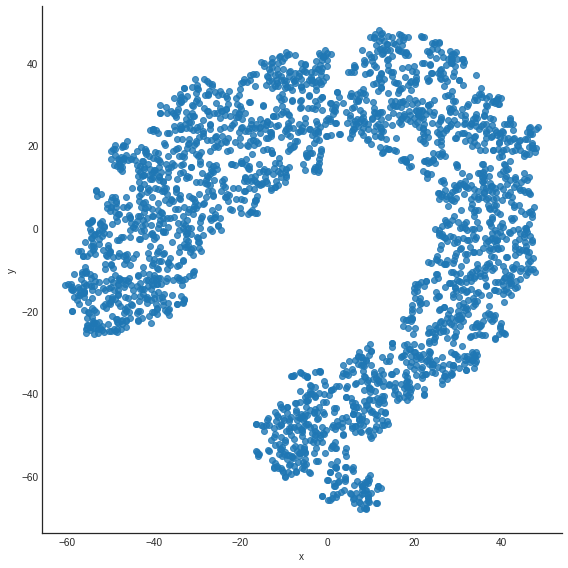

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data = df, fit_reg = False, size = 8)
plt.show()

# word2vec은 고차원의 벡터이겠지만 tsne로 2차원으로 바꿔서 본 것

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [42]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters = 6, linkage = 'ward') # ward 방법으로 6개로 병합군집 실시
predict = ward.fit_predict(df)
predict

array([2, 2, 2, ..., 1, 1, 1])

In [43]:
results = df
results['predict'] = predict

results[0:10]

,x,y,predict
을,-12.405201,-57.995373,2
배우,-7.119183,-59.101707,2
는,-12.300349,-57.737999,2
학생,31.193537,41.007114,4
으로,-6.634861,-55.141216,2
",",-8.492330,-59.541965,2
외국,-48.561096,-2.830502,1
와,-7.117889,-58.741016,2
그,-10.343085,-58.490665,2
들,-9.062732,-59.115776,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


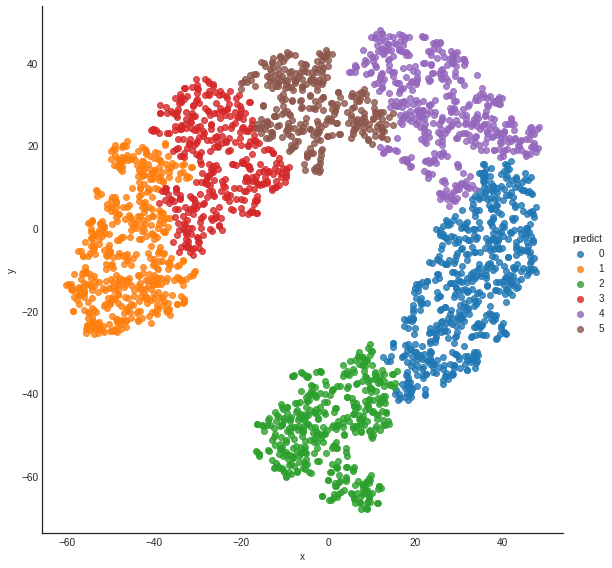

In [44]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### average

In [45]:
avg = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
predict = avg.fit_predict(df)
predict

array([3, 3, 3, ..., 0, 0, 0])

In [46]:
results = df
results['predict'] = predict

results[0:10]

,x,y,predict
을,-12.405201,-57.995373,3
배우,-7.119183,-59.101707,3
는,-12.300349,-57.737999,3
학생,31.193537,41.007114,2
으로,-6.634861,-55.141216,3
",",-8.492330,-59.541965,3
외국,-48.561096,-2.830502,0
와,-7.117889,-58.741016,3
그,-10.343085,-58.490665,3
들,-9.062732,-59.115776,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


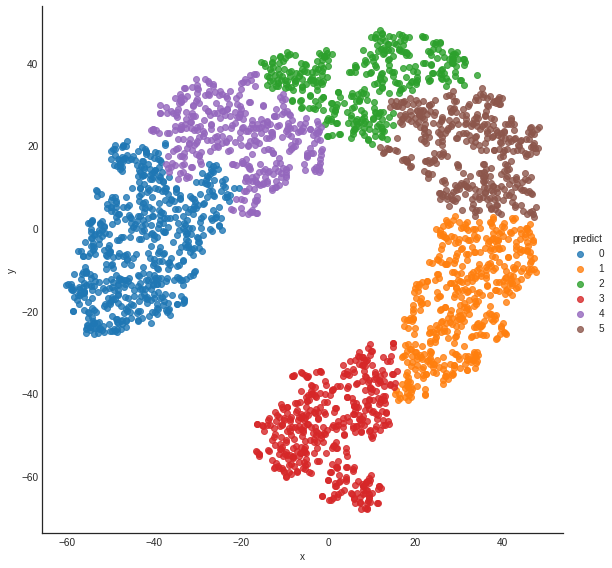

In [47]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 8, hue = 'predict')
plt.show()

#### complete

In [48]:
compl = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
predict = compl.fit_predict(df)
predict

array([5, 5, 5, ..., 1, 1, 1])

In [49]:
results = df
results['predict'] = predict

results[0:10]

,x,y,predict
을,-12.405201,-57.995373,5
배우,-7.119183,-59.101707,5
는,-12.300349,-57.737999,5
학생,31.193537,41.007114,4
으로,-6.634861,-55.141216,5
",",-8.492330,-59.541965,5
외국,-48.561096,-2.830502,1
와,-7.117889,-58.741016,5
그,-10.343085,-58.490665,5
들,-9.062732,-59.115776,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


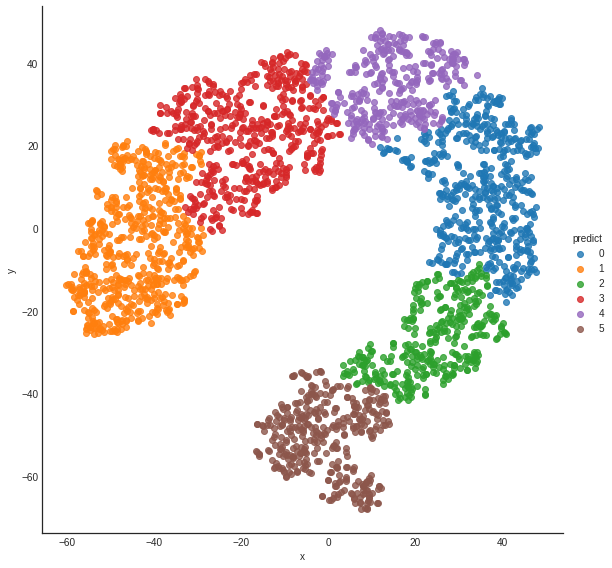

In [51]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 8, hue = 'predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [53]:
# 계층적 방법은 거리 계산된 결과가 필요

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric = 'euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,5.400552,0.277912,108.181987,6.437627,4.207435,66.078830,5.339630,2.120763,3.525252,...,79.310899,65.098663,55.096151,64.570707,73.158814,45.260692,66.501143,51.058515,62.023895,54.878718
1,5.400552,0.000000,5.357629,107.194406,3.989995,1.441998,69.999148,0.360693,3.281298,1.943600,...,80.859978,68.857147,57.937785,69.007585,76.498521,49.203535,70.198332,55.484928,66.563282,59.659143
2,0.277912,5.357629,0.000000,107.904196,6.232258,4.213705,65.921734,5.278630,2.096995,3.518584,...,79.059518,64.931578,54.883547,64.451316,72.969718,45.103174,66.330590,50.937366,61.913348,54.791908
3,108.181987,107.194406,107.904196,0.000000,103.327098,108.102199,91.057883,106.857171,107.824390,107.917377,...,51.700279,88.107231,76.261614,100.958154,81.171495,91.647658,87.114962,98.696038,102.588398,106.239103
4,6.437627,3.989995,6.232258,103.327098,0.000000,4.776692,67.158172,3.632062,4.996973,4.657433,...,76.989988,65.902678,54.501727,66.620429,73.271494,46.449783,67.199520,53.131502,64.291821,57.705199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,45.260692,49.203535,45.103174,91.647658,46.449783,48.737755,20.875253,48.919562,46.816295,48.060906,...,46.178595,20.011281,16.558901,21.213853,29.147261,0.000000,21.515834,9.346195,19.729537,17.169873
2635,66.501143,70.198332,66.330590,87.114962,67.199520,69.831643,3.994361,69.897667,67.970747,69.169705,...,36.082605,1.740460,17.147021,14.289359,9.023418,21.515834,0.000000,19.655836,16.707226,23.633018
2636,51.058515,55.484928,50.937366,98.696038,53.131502,54.840089,17.344419,55.232434,52.810092,54.139822,...,50.874532,17.918463,22.459789,13.553054,28.533465,9.346195,19.655836,0.000000,11.254527,8.041319
2637,62.023895,66.563282,61.913348,102.588398,64.291821,65.876418,12.887314,66.318413,63.823528,65.171864,...,52.346453,15.252434,27.690121,3.370243,25.283614,19.729537,16.707226,11.254527,0.000000,8.909581


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

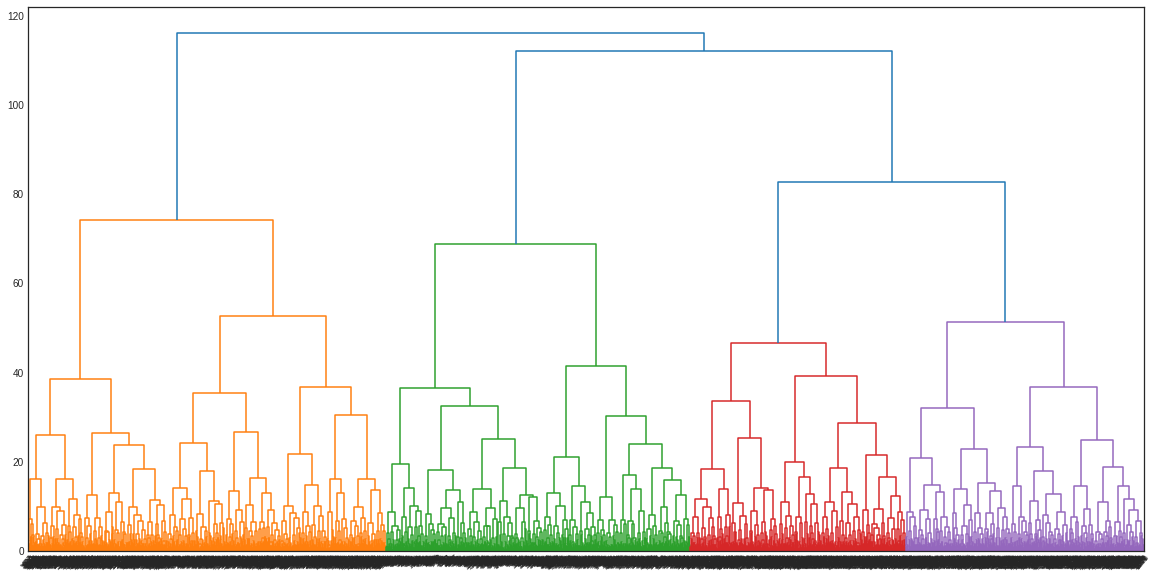

In [54]:
row_clusters = linkage(distmatrix, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(row_clusters, 
           leaf_rotation = 50,
           leaf_font_size = 7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

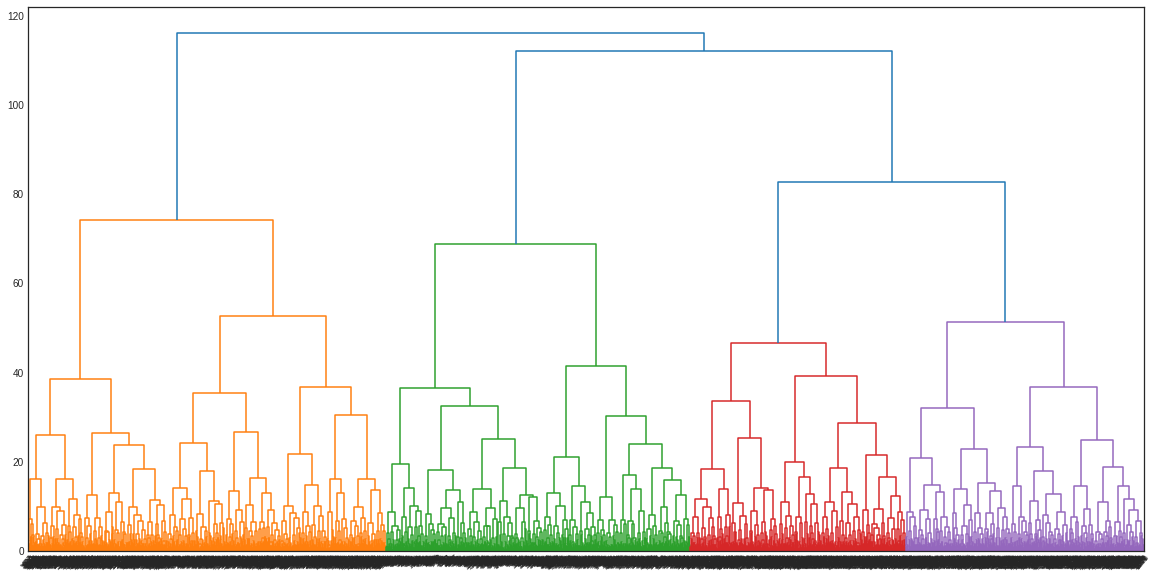

In [55]:
mergings = linkage(df, method = 'complete')

plt.figure(figsize = (20, 10))
dendrogram(row_clusters, 
           leaf_rotation = 50,
           leaf_font_size = 7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [57]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
을,-12.405201,-57.995373,0
배우,-7.119183,-59.101707,0
는,-12.300349,-57.737999,0
학생,31.193537,41.007114,1
으로,-6.634861,-55.141216,0
",",-8.492330,-59.541965,0
외국,-48.561096,-2.830502,2
와,-7.117889,-58.741016,0
그,-10.343085,-58.490665,0
들,-9.062732,-59.115776,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


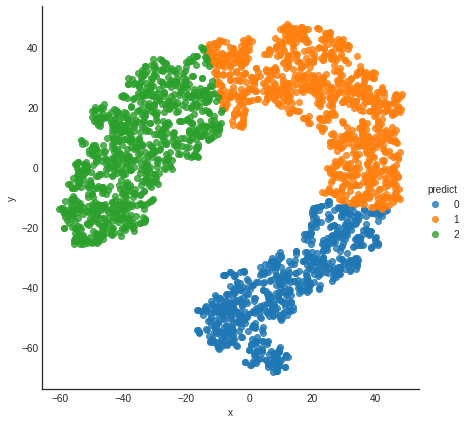

In [58]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 6, hue = 'predict')
plt.show()

### 클러스터 개수 6

In [59]:
kmeans = KMeans(n_clusters = 6)
predict = kmeans.fit_predict(df)
predict

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [60]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
을,-12.405201,-57.995373,0
배우,-7.119183,-59.101707,0
는,-12.300349,-57.737999,0
학생,31.193537,41.007114,5
으로,-6.634861,-55.141216,0
",",-8.492330,-59.541965,0
외국,-48.561096,-2.830502,3
와,-7.117889,-58.741016,0
그,-10.343085,-58.490665,0
들,-9.062732,-59.115776,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


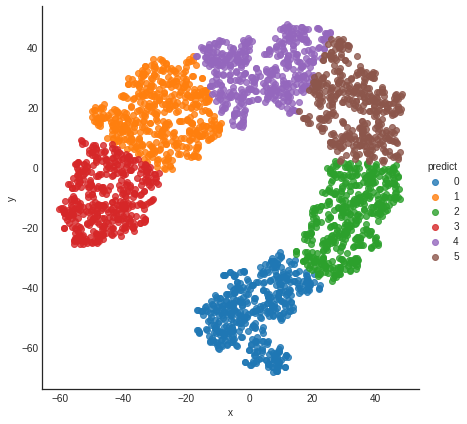

In [61]:
sns.lmplot('x', 'y', data = results, fit_reg = False, size = 6, hue = 'predict')
plt.show()